In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Ingresamos el dataset y damos una vista previa.

In [144]:
df = pd.read_csv('lol.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# Hacemos un análisis mas detallado en busqueda de outliers

In [145]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


# Ya que no encontramos outliers de esa manera los buscamos inspeccionando los tipos de datos

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [147]:
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

# Vemos que los datos estan limpios y listos para trabajar

In [148]:
y = df['blueWins'].values
X = df.drop(['blueWins'],axis=1).values
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,shuffle=True)

In [149]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
accuracy_score(clf.predict(X_test),y_test) 


C:\Users\Ja_ar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7380566801619434

Obtenemos 0.7380566801619434 como resultado de nuestra regresión logistica

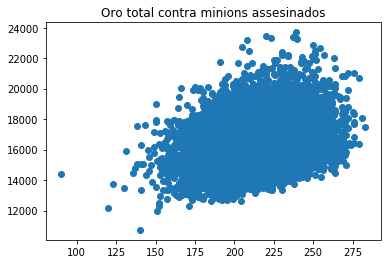

In [150]:
x1 = df['blueTotalMinionsKilled']
y1 = df['blueTotalGold']
plt.title('Oro total contra minions assesinados')
plt.scatter(x1, y1)
plt.show()

Como podemos observar en la gráfica no se puede ver un patron claro que entre mas minions sean assesinados se incrementara el oro de una manera tan linea como se esperaba, hay factores mas importantes que los minions para el incremento en el oro del equipo.

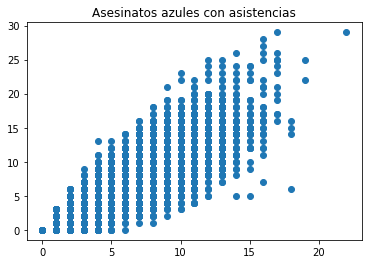

In [151]:
x1 = df['blueKills']
y1 = df['blueAssists']
plt.title('Asesinatos azules con asistencias')
plt.scatter(x1, y1)
plt.show()

Aquí se puede observar una relación mas clara entre las asistencias del equipo y los asesinatos en el equipo.

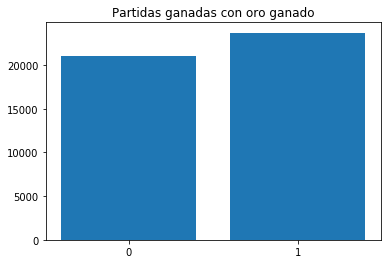

In [152]:
x1 = df['blueWins']
y1 = df['blueTotalGold']
plt.bar(x1, y1)
plt.title('Partidas ganadas con oro ganado')
plt.xticks(range(0,2))
plt.show()

Una gráfica que muestra la relación de partidas ganadas con el oro obtenido, como se puede observar las partidas ganadas tenian una mayor cantidad de oro en el equipo

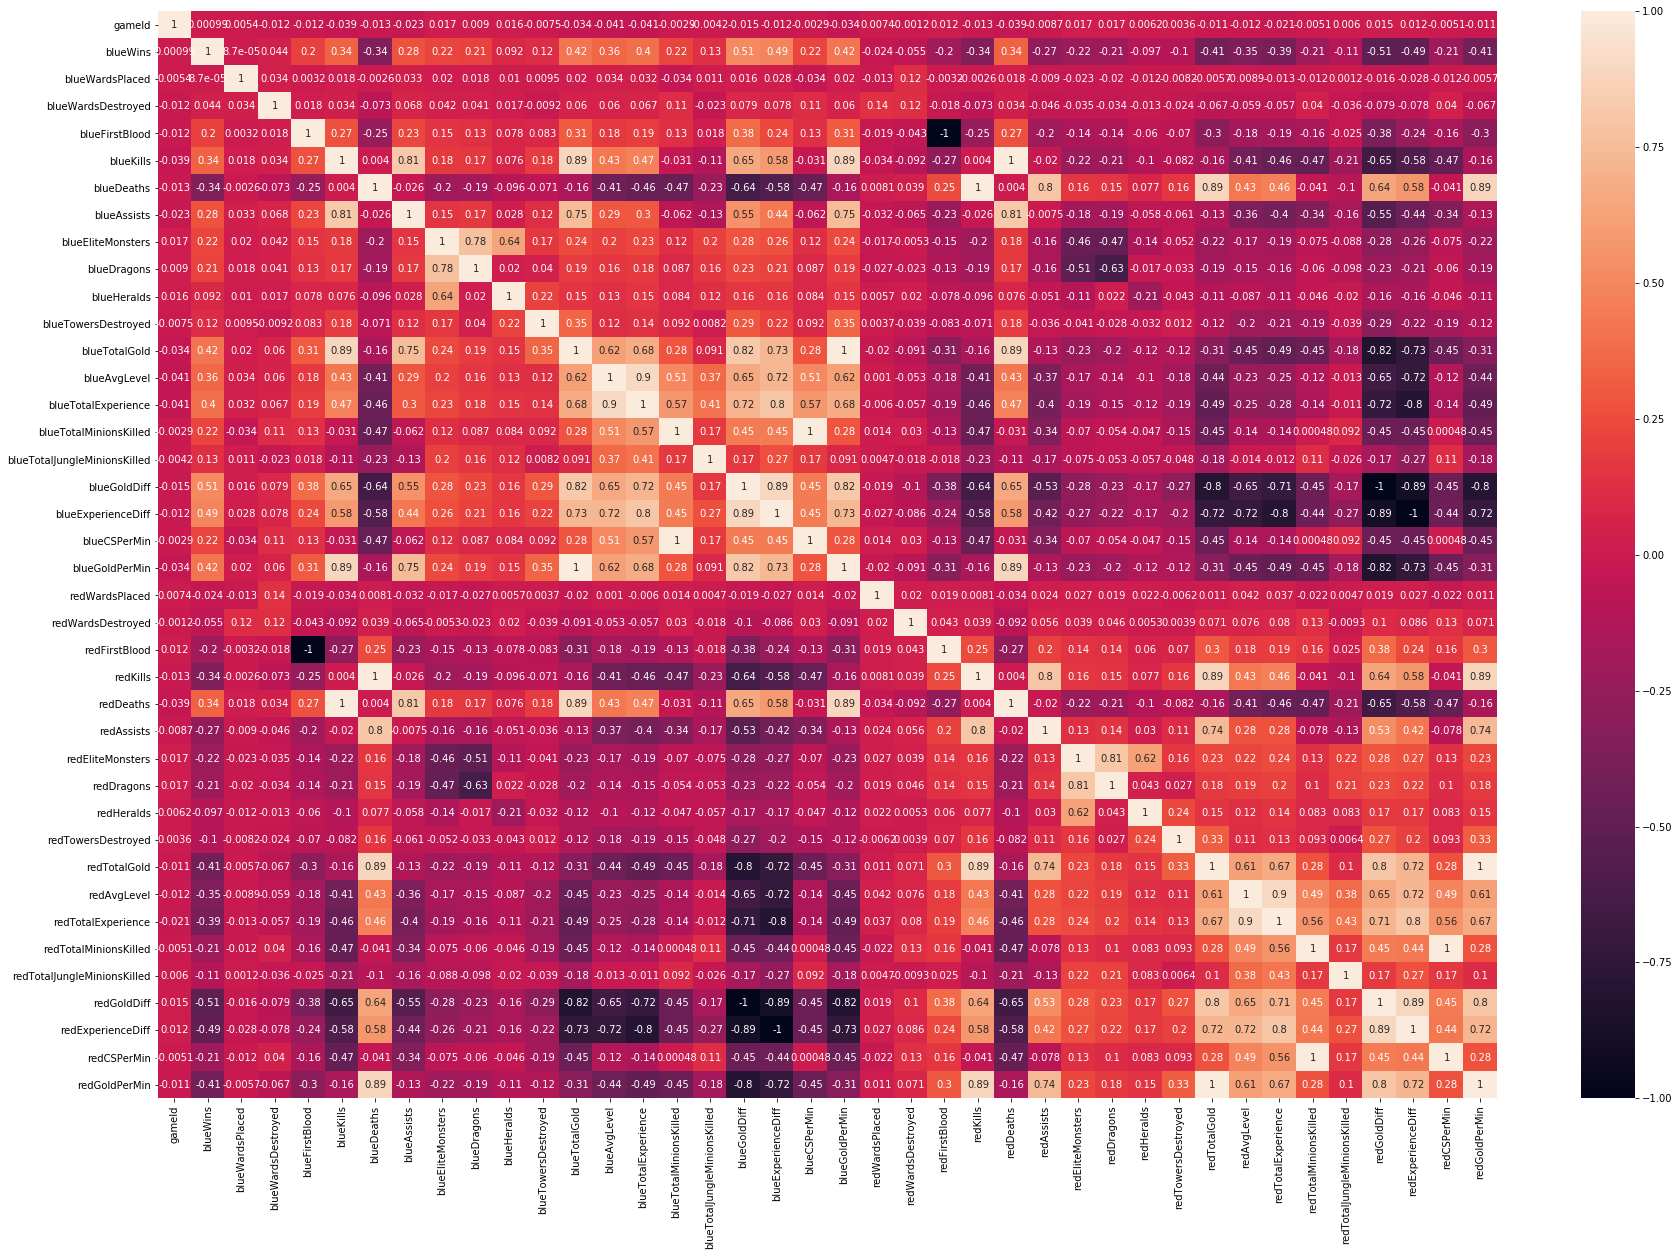

In [153]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot =  True)

Hacemos un heat map global para buscar las variables mas relacionadas con el target que es cuando blueWins = 1

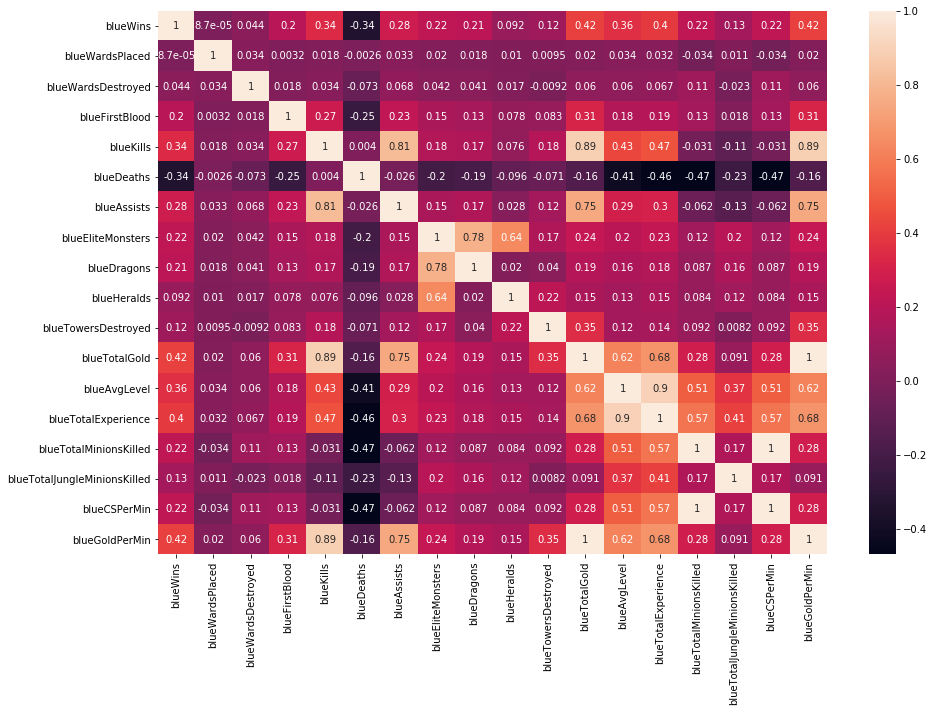

In [154]:
df_1 = df.copy()
df_1 = df_1.drop(['blueGoldDiff', 'blueExperienceDiff','redGoldDiff',
       'redExperienceDiff','gameId'], axis=1)
df_blue = df_1.drop(['redWardsPlaced','redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'], axis=1)
corr = df_blue.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot =  True)

Hacemos un heat map con las variables del equipo azul para poder observarlos mas detalladamente y estudiarlos mas de cerca.

To do: explicación de ciertas caracteristicas en el heat map

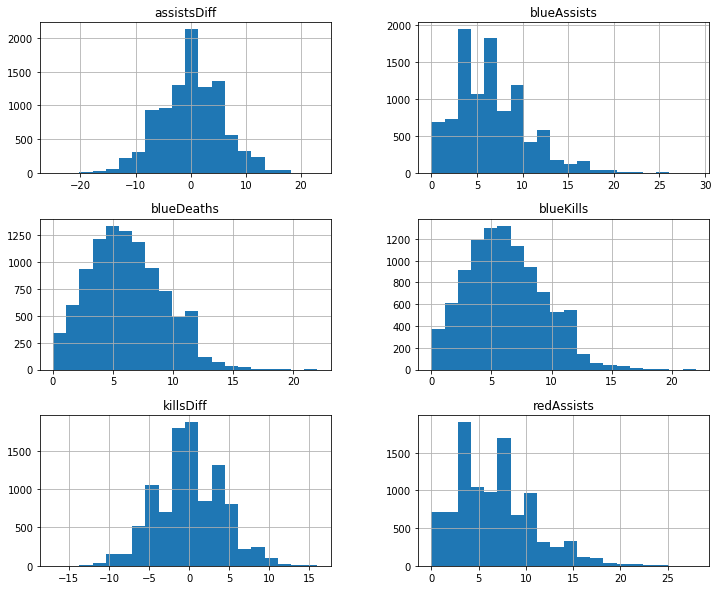

In [155]:
df['killsDiff'] = df['blueKills'] - df['blueDeaths']
df['assistsDiff'] = df['blueAssists'] - df['redAssists']

df[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

Graficamos los datos buscando relacion entre los datos y podemos observar que las graficas son bastantes similares para ambos equipos